## 1. Imports

In [1]:
#import relevant libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process
import os

## 2. Load Data

In [2]:
#load relevant data

shots_07_21 = pd.read_csv(r"C:\Users\Travi\OneDrive\Documents\GitHub\Springboard\nhl data\shots_2007-2021\shots_2007-2021.csv")
shots_22 = pd.read_csv(r"C:\Users\Travi\OneDrive\Documents\GitHub\Springboard\nhl data\shots_2022\shots_2022.csv")

## 3. Comparing Data Sets

In [3]:
#I started by looking at the shape and basic info from both data sets

print(shots_07_21.info())
print(shots_22.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595720 entries, 0 to 1595719
Columns: 124 entries, shotID to arenaAdjustedXCordABS
dtypes: float64(40), int64(71), object(13)
memory usage: 1.5+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122026 entries, 0 to 122025
Columns: 124 entries, shotID to yCordAdjusted
dtypes: float64(37), int64(74), object(13)
memory usage: 115.4+ MB
None


In [4]:
print(f"Shots_07_21 shape: {shots_07_21.shape}")
print(f"Shots_22 shape: {shots_22.shape}")

Shots_07_21 shape: (1595720, 124)
Shots_22 shape: (122026, 124)


In [5]:
#Next, I compared the columns from both data sets to ensure I will have no issues with merging the data

print(f" 2007 to 2021 shots columns: {shots_07_21.columns}")
print(f" 2022 shots columns: {shots_22.columns}")

 2007 to 2021 shots columns: Index(['shotID', 'homeTeamCode', 'awayTeamCode', 'season', 'isPlayoffGame',
       'game_id', 'homeTeamWon', 'id', 'time', 'timeUntilNextEvent',
       ...
       'xFroze', 'xRebound', 'xPlayContinuedInZone',
       'xPlayContinuedOutsideZone', 'xPlayStopped', 'xShotWasOnGoal',
       'isHomeTeam', 'shotWasOnGoal', 'teamCode', 'arenaAdjustedXCordABS'],
      dtype='object', length=124)
 2022 shots columns: Index(['shotID', 'arenaAdjustedShotDistance', 'arenaAdjustedXCord',
       'arenaAdjustedXCordABS', 'arenaAdjustedYCord', 'arenaAdjustedYCordAbs',
       'averageRestDifference', 'awayEmptyNet', 'awayPenalty1Length',
       'awayPenalty1TimeLeft',
       ...
       'xCordAdjusted', 'xFroze', 'xGoal', 'xPlayContinuedInZone',
       'xPlayContinuedOutsideZone', 'xPlayStopped', 'xRebound',
       'xShotWasOnGoal', 'yCord', 'yCordAdjusted'],
      dtype='object', length=124)


In [6]:
columns_07_21 = list(shots_07_21.columns)
columns_22 = list(shots_07_21.columns)

# Function to compare column names
def compare_columns(df1, df2):
    for col1 in df1.columns:
        for col2 in df2.columns:
            similarity = fuzz.ratio(col1, col2)
            if similarity > 80:  # Threshold for similarity
                print(f"Similar columns: '{col1}' and '{col2}' with similarity {similarity}%")

compare_columns(shots_07_21, shots_22)

Similar columns: 'shotID' and 'shotID' with similarity 100%
Similar columns: 'homeTeamCode' and 'homeTeamCode' with similarity 100%
Similar columns: 'awayTeamCode' and 'awayTeamCode' with similarity 100%
Similar columns: 'season' and 'season' with similarity 100%
Similar columns: 'isPlayoffGame' and 'isPlayoffGame' with similarity 100%
Similar columns: 'game_id' and 'game_id' with similarity 100%
Similar columns: 'homeTeamWon' and 'homeTeamWon' with similarity 100%
Similar columns: 'id' and 'id' with similarity 100%
Similar columns: 'time' and 'time' with similarity 100%
Similar columns: 'timeUntilNextEvent' and 'timeUntilNextEvent' with similarity 100%
Similar columns: 'timeSinceLastEvent' and 'timeSinceLastEvent' with similarity 100%
Similar columns: 'period' and 'period' with similarity 100%
Similar columns: 'team' and 'team' with similarity 100%
Similar columns: 'location' and 'location' with similarity 100%
Similar columns: 'event' and 'event' with similarity 100%
Similar columns:

In [7]:
#Next I previewed both data sets

shots_07_21.head()

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
0,0,TBL,PIT,2021,0,20001,0,10,63,0.0,...,0.202514,0.028594,0.445979,0.289830,0.023891,0.718082,1.0,1.0,TBL,61.0
1,1,TBL,PIT,2021,0,20001,0,15,104,13.0,...,0.285948,0.027629,0.303080,0.325607,0.026384,0.793188,0.0,1.0,PIT,65.0
2,2,TBL,PIT,2021,0,20001,0,17,121,31.0,...,0.161225,0.012846,0.307661,0.486296,0.019218,0.840122,1.0,1.0,TBL,8.0
3,3,TBL,PIT,2021,0,20001,0,21,167,1.0,...,0.161623,0.053163,0.374061,0.264891,0.024508,0.729294,0.0,1.0,PIT,60.0
4,4,TBL,PIT,2021,0,20001,0,24,187,4.0,...,0.116379,0.059078,0.432747,0.284554,0.018850,0.695010,1.0,1.0,TBL,63.0


In [8]:
shots_22.head()

,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,...,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
0,0,43.0,47.0,47.0,8.0,8.0,0.0,0,0,0,...,44,0.214393,0.026009,0.398742,0.300830,0.022987,0.037040,0.710473,8,8
1,1,51.0,45.0,45.0,26.0,26.0,0.0,0,0,0,...,44,0.186673,0.007774,0.455486,0.294453,0.020666,0.034948,0.667152,27,27
2,2,59.0,-31.0,31.0,8.0,8.0,0.0,0,0,0,...,33,0.256798,0.046070,0.358080,0.259696,0.027936,0.051420,0.644651,8,-8
3,3,14.0,-76.0,76.0,-4.0,4.0,0.0,0,0,0,...,74,0.172590,0.296800,0.230564,0.183049,0.024885,0.092112,0.898032,-5,5
4,4,14.0,-82.0,82.0,12.0,12.0,0.0,0,0,0,...,81,0.128260,0.057435,0.446106,0.286419,0.019556,0.062224,0.759405,15,-15


## 3.1 Comparing Data Sets - Verifing Object Data types

In [9]:
#I then wanted to verify that the important object data types were consistant between the data sets

print(f"2007 to 2021 team codes: {shots_07_21['teamCode'].unique()}")
print(f"2022 team codes: {shots_22['teamCode'].unique()}")

2007 to 2021 team codes: ['TBL' 'PIT' 'SEA' 'VGK' 'MTL' 'TOR' 'NYR' 'WSH' 'ANA' 'WPG' 'CHI' 'COL'
 'VAN' 'EDM' 'BUF' 'OTT' 'FLA' 'DAL' 'NYI' 'CAR' 'CBJ' 'ARI' 'DET' 'NSH'
 'LAK' 'NJD' 'PHI' 'MIN' 'BOS' 'STL' 'SJS' 'CGY' 'T.B' 'N.J' 'S.J' 'L.A'
 'ATL']
2022 team codes: ['SJS' 'NSH' 'TBL' 'NYR' 'VGK' 'LAK' 'WSH' 'BOS' 'CAR' 'CBJ' 'TOR' 'MTL'
 'COL' 'CHI' 'ANA' 'SEA' 'EDM' 'VAN' 'PIT' 'ARI' 'PHI' 'NJD' 'OTT' 'BUF'
 'FLA' 'NYI' 'MIN' 'DAL' 'CGY' 'DET' 'WPG' 'STL']


In [10]:
#There was some differences for the team codes between the data sets. I eliminated the dubplicated team codes so both data sets matched.

teamCode_replacements={'T.B':'TBL', 'S.J':'SJS', 'N.J':'NJD', 'L.A':'LAK'}
shots_07_21.replace(teamCode_replacements, inplace=True)
print(f"teamCode: {shots_07_21['teamCode'].unique()}")
print(f"homeTeamCode: {shots_07_21['homeTeamCode'].unique()}")
print(f"awayTeamCode: {shots_07_21['awayTeamCode'].unique()}")

teamCode: ['TBL' 'PIT' 'SEA' 'VGK' 'MTL' 'TOR' 'NYR' 'WSH' 'ANA' 'WPG' 'CHI' 'COL'
 'VAN' 'EDM' 'BUF' 'OTT' 'FLA' 'DAL' 'NYI' 'CAR' 'CBJ' 'ARI' 'DET' 'NSH'
 'LAK' 'NJD' 'PHI' 'MIN' 'BOS' 'STL' 'SJS' 'CGY' 'ATL']
homeTeamCode: ['TBL' 'VGK' 'TOR' 'WSH' 'ANA' 'COL' 'EDM' 'BUF' 'OTT' 'FLA' 'NYR' 'CAR'
 'CBJ' 'DET' 'NSH' 'LAK' 'NJD' 'PHI' 'BOS' 'MTL' 'PIT' 'SJS' 'CGY' 'ARI'
 'CHI' 'MIN' 'WPG' 'DAL' 'STL' 'SEA' 'VAN' 'NYI' 'ATL']
awayTeamCode: ['PIT' 'SEA' 'MTL' 'NYR' 'WPG' 'CHI' 'VAN' 'TOR' 'DAL' 'NYI' 'ARI' 'TBL'
 'VGK' 'MIN' 'OTT' 'CAR' 'STL' 'CGY' 'ANA' 'SJS' 'FLA' 'COL' 'CBJ' 'LAK'
 'BOS' 'WSH' 'EDM' 'NSH' 'DET' 'BUF' 'PHI' 'NJD' 'ATL']


In [11]:
#I wanted to verify that there were no other differences amoung the other object columns
#I started by isolating all object columns

print(f"Number of object type columns: {(shots_07_21.dtypes == object).sum()}")
print(f"Name of 07_21 object columns: {list(shots_07_21.select_dtypes('object').columns)}")
print('_______________________________________________________')
print(f"Number of object type columns: {(shots_22.dtypes == object).sum()}")
print(f"Name of 2022 object columns: {list(shots_22.select_dtypes('object').columns)}")

Number of object type columns: 13
Name of 07_21 object columns: ['homeTeamCode', 'awayTeamCode', 'team', 'location', 'event', 'shotType', 'lastEventCategory', 'lastEventTeam', 'playerPositionThatDidEvent', 'goalieNameForShot', 'shooterName', 'shooterLeftRight', 'teamCode']
_______________________________________________________
Number of object type columns: 13
Name of 2022 object columns: ['awayTeamCode', 'event', 'goalieNameForShot', 'homeTeamCode', 'lastEventCategory', 'lastEventTeam', 'location', 'playerPositionThatDidEvent', 'shooterLeftRight', 'shooterName', 'shotType', 'team', 'teamCode']


In [12]:
#Nexts I printed all unique object types from each data set to compare since there were a small number of columns
#The only column that had a difference will not be used in the final data set. 

object_var = ['shotType', 'team', 'shooterLeftRight','lastEventCategory', 'event', 'playerPositionThatDidEvent', 'location']
for i in object_var:
    print(i, shots_07_21[i].unique())

print('2022 season')
for i in object_var:
    print(i, shots_22[i].unique())

shotType ['WRIST' 'SLAP' 'BACK' 'TIP' 'SNAP' 'WRAP' 'DEFL' nan]
team ['HOME' 'AWAY']
shooterLeftRight ['R' 'L' nan]
lastEventCategory ['HIT' 'BLOCK' 'FAC' 'GIVE' 'SHOT' 'TAKE' 'MISS' 'DELPEN' 'CHL' 'STOP'
 'EGT' 'PEND' 'GEND' 'PENL' 'GOAL' 'EISTR' 'PSTR' 'ANTHEM' nan]
event ['SHOT' 'MISS' 'GOAL']
playerPositionThatDidEvent ['C' 'L' 'D' 'R' 'G' nan]
location ['AWAYZONE' 'HOMEZONE' 'Neu. Zone' nan]
2022 season
shotType ['WRIST' 'SLAP' 'TIP' 'SNAP' 'BACK' 'WRAP' 'DEFL' nan]
team ['AWAY' 'HOME']
shooterLeftRight ['L' 'R' nan]
lastEventCategory ['HIT' 'FAC' 'BLOCK' 'SHOT' 'GIVE' 'MISS' 'TAKE' 'DELPEN' 'STOP' 'CHL']
event ['SHOT' 'MISS' 'GOAL']
playerPositionThatDidEvent ['R' 'D' 'L' 'C' 'G' nan]
location ['HOMEZONE' 'AWAYZONE' 'Neu. Zone']


## 4. Merge Data Frames

In [13]:
#Now that I verified my data was in order, I concatenated the 2 data frames

all_shots_07_22 = pd.concat([shots_07_21,shots_22], ignore_index=True)
all_shots_07_22 = all_shots_07_22.sort_values(by='season', ascending=False)
all_shots_07_22.reset_index()
all_shots_07_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1717746 entries, 1595720 to 421904
Columns: 124 entries, shotID to arenaAdjustedXCordABS
dtypes: float64(40), int64(71), object(13)
memory usage: 1.6+ GB


In [14]:
all_shots_07_22.head()

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
1595720,0,NSH,SJS,2022,0,20001,1,8,23,1.0,...,0.214393,0.037040,0.398742,0.300830,0.022987,0.710473,0.0,1.0,SJS,47.0
1595721,1,NSH,SJS,2022,0,20001,1,11,36,6.0,...,0.186673,0.034948,0.455486,0.294453,0.020666,0.667152,0.0,0.0,SJS,45.0
1595722,2,NSH,SJS,2022,0,20001,1,15,59,2.0,...,0.256798,0.051420,0.358080,0.259696,0.027936,0.644651,1.0,1.0,NSH,31.0
1595723,3,NSH,SJS,2022,0,20001,1,16,61,0.0,...,0.172590,0.092112,0.230564,0.183049,0.024885,0.898032,1.0,1.0,NSH,76.0
1595724,4,NSH,SJS,2022,0,20001,1,18,72,1.0,...,0.128260,0.062224,0.446106,0.286419,0.019556,0.759405,1.0,1.0,NSH,82.0


In [15]:
#Next, I wanted to isolate all shots that were goals to help subset and explore categories of intrest. 
#I was also interested to see what the overall goal percentage was over the span of 17 years. 

all_goals = all_shots_07_22[all_shots_07_22['goal'] != 0]
all_goals = all_goals[['goal', 'shotID', 'season', 'xCord', 'yCord', 'game_id', 'homeTeamCode', 'awayTeamCode', 'isHomeTeam', 'teamCode','playerPositionThatDidEvent', 'shooterTimeOnIce']]
total_shots_07_22 = all_shots_07_22['shotID'].count()
total_goals_07_22 = all_shots_07_22['goal'].sum()
goal_percentage = 100 * (total_goals_07_22/total_shots_07_22)
print(f"Goal percertange from 2007 to 2022 was {goal_percentage.round(2)}%. Only {total_goals_07_22} out of {total_shots_07_22} toal shots were goals")

Goal percertange from 2007 to 2022 was 6.67%. Only 114591 out of 1717746 toal shots were goals


In [16]:
#I then calculated the chances of scoring a goal on any given shot to see how difficult it is to score in the NHL

goal_per_shot = total_goals_07_22/total_shots_07_22
print(f'The chances of scoring a goal on any given shot between 2007 and 2022 is {goal_per_shot.round(2)}%')

The chances of scoring a goal on any given shot between 2007 and 2022 is 0.07%


In [17]:
#Since I am preparing to make a goal scoring prediction model, I dropped all shots that were not considered to be "on gaol"

all_shots_on_goal_07_22 = pd.DataFrame(all_shots_07_22[all_shots_07_22['shotWasOnGoal'] != 0])
all_shots_on_goal_07_22.reset_index()
all_shots_on_goal_07_22.head()

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
1595720,0,NSH,SJS,2022,0,20001,1,8,23,1.0,...,0.214393,0.037040,0.398742,0.300830,0.022987,0.710473,0.0,1.0,SJS,47.0
1595722,2,NSH,SJS,2022,0,20001,1,15,59,2.0,...,0.256798,0.051420,0.358080,0.259696,0.027936,0.644651,1.0,1.0,NSH,31.0
1595723,3,NSH,SJS,2022,0,20001,1,16,61,0.0,...,0.172590,0.092112,0.230564,0.183049,0.024885,0.898032,1.0,1.0,NSH,76.0
1595724,4,NSH,SJS,2022,0,20001,1,18,72,1.0,...,0.128260,0.062224,0.446106,0.286419,0.019556,0.759405,1.0,1.0,NSH,82.0
1595726,6,NSH,SJS,2022,0,20001,1,26,162,25.0,...,0.083920,0.046011,0.454167,0.309893,0.022000,0.536515,0.0,1.0,SJS,75.0


In [18]:
#Verified that shots the shots that were not "on goal" were dropped. 

all_shots_on_goal_07_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1241030 entries, 1595720 to 421904
Columns: 124 entries, shotID to arenaAdjustedXCordABS
dtypes: float64(40), int64(71), object(13)
memory usage: 1.2+ GB


## 5. Missing Values

In [19]:
#I now wanted to determine how many missing values were present in the data. 

missing = pd.concat([all_shots_on_goal_07_22.isnull().sum(), 100 * all_shots_on_goal_07_22.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending=False)

,count,%
goalieNameForShot,6769,0.545434
goalieIdForShot,1663,0.134002
playerPositionThatDidEvent,1039,0.083721
shotType,895,0.072118
shooterLeftRight,78,0.006285
...,...,...
xShotWasOnGoal,0,0.000000
isHomeTeam,0,0.000000
shotWasOnGoal,0,0.000000
teamCode,0,0.000000


In [20]:
#filtered the list to include only columns with missing vaules

missing_filtered = missing.loc[missing['count'] != 0]
missing_filtered.sort_values(by='count',ascending=False)

,count,%
goalieNameForShot,6769,0.545434
goalieIdForShot,1663,0.134002
playerPositionThatDidEvent,1039,0.083721
shotType,895,0.072118
shooterLeftRight,78,0.006285
shooterName,62,0.004996
shooterPlayerId,23,0.001853
lastEventCategory,2,0.000161
lastEventTeam,2,0.000161
location,1,0.000081


In [21]:
#Since my missing values accounted for a very small percentage of my data set, I dropped all rows with missing values. 

rows_to_drop = ['shooterLeftRight', 'shooterName','lastEventCategory', 'lastEventTeam', 'shooterPlayerId', 
                'location', 'shotType', 'playerPositionThatDidEvent']
for i in rows_to_drop:
    all_shots_on_goal_07_22.dropna(subset = [i], inplace=True)

In [22]:
#Verified that all missing values were dropped. I left the missing values in the goalie columns because those will be dropped later. 

missing2 = pd.DataFrame(all_shots_on_goal_07_22.isnull().sum())
missing2.columns=['count']
missing2_filtered = missing2.loc[missing['count'] != 0]
missing2_filtered.sort_values(by = 'count', ascending=False)

,count
goalieNameForShot,6614
goalieIdForShot,1654
shotType,0
location,0
lastEventTeam,0
lastEventCategory,0
playerPositionThatDidEvent,0
shooterPlayerId,0
shooterName,0
shooterLeftRight,0


## 6. Examine Variables of Intrest

In [23]:
#The first variable I explored was goals scored based on player position. Distubutions were visulized int he next steps.

goals_by_position = pd.DataFrame(all_goals.groupby('playerPositionThatDidEvent')['goal'].count())
goals_by_position.columns = ['total goals']
goals_by_position.reset_index()

,playerPositionThatDidEvent,total goals
0,C,46710
1,D,17136
2,G,5
3,L,26158
4,R,24407


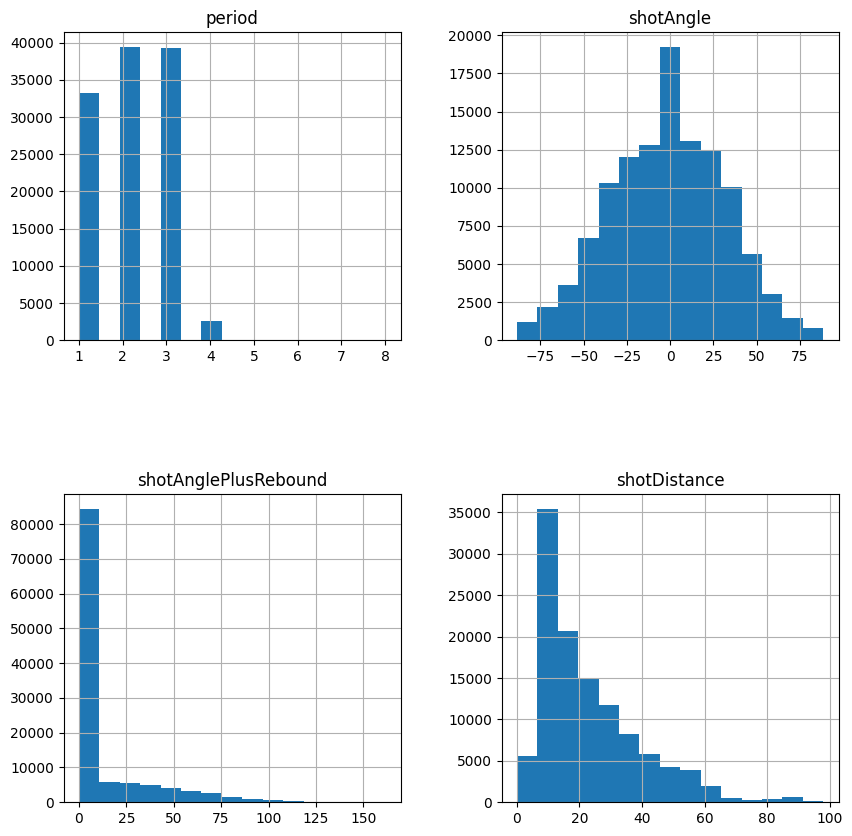

In [24]:
#The other variables of intrest were goals scored by period, shot angle, shot angle after rebound, shot distance.
#Distributions were plotted. All distributions were within expecations. 

all_goals2 = all_shots_07_22[all_shots_07_22['goal'] != 0]
all_goals2 = all_goals2[['period', 'shotAngle','shotAnglePlusRebound', 'shotDistance', 'shotType', 'team', 'shooterLeftRight','season', 'teamCode', 'goal']]
all_goals2.reset_index()
all_goals2[['period', 'shotAngle','shotAnglePlusRebound', 'shotDistance']].hist(bins=15, figsize=[10,10])
plt.subplots_adjust(hspace=0.5);

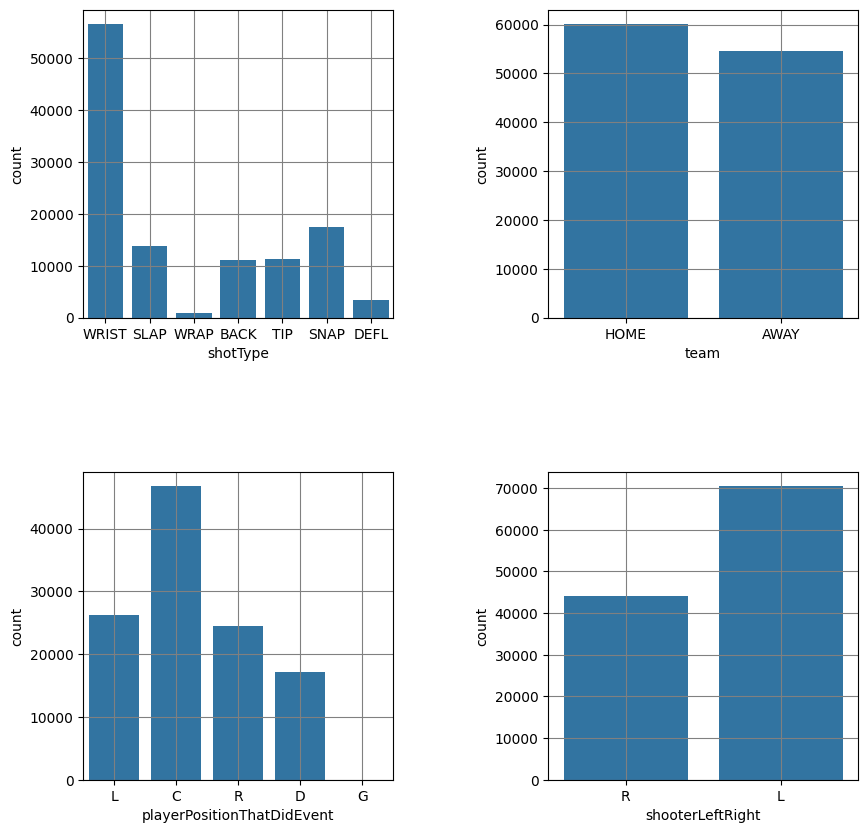

In [25]:
#I then created distributions for shot type, home/away team, shooter handiness, and player position.
#Some interesting insights was the fact that it appears left handed shooters score more goals than right handed shooters. 
#It also appears wrist shots and players playing the center position account for a large amount of goals making this a very interesting variable. 

fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.countplot(data=all_goals2, x='shotType',ax=axes[0,0])
axes[0,0].grid(True,color = "grey")
sns.countplot(data=all_goals2, x='team',ax=axes[0,1])
axes[0,1].grid(True,color = "grey")
sns.countplot(data=all_goals2, x='shooterLeftRight', ax=axes[1,1])
axes[1,1].grid(True,color = "grey")
sns.countplot(x='playerPositionThatDidEvent', data=all_goals, ax=axes[1,0])
axes[1,0].grid(True,color = "grey")
plt.subplots_adjust(hspace=0.5,wspace=0.5);

(0.0, 175.0)

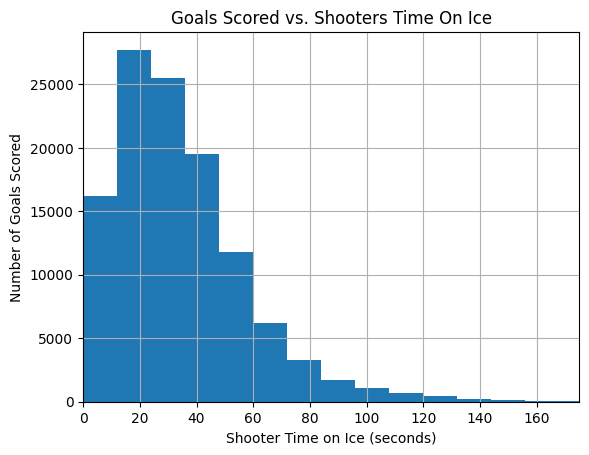

In [26]:
#Next I explored the relationship between time on the ice from the beginning of the shift compared to goals scored. 
#As expected the distribution is skewed with the majority of goals scored withing 20 to 30 seconds of starting the shift. 

avg_time_on_ice_goal = all_goals['shooterTimeOnIce']
avg_time_on_ice_goal.hist(bins=100)
plt.xlabel('Shooter Time on Ice (seconds)')
plt.ylabel('Number of Goals Scored')
plt.title('Goals Scored vs. Shooters Time On Ice')
plt.xlim(0, 175)

In [27]:
#I then wanted to see if there were any teams that accounted for a larger portion of goals compared to others.
#I started by grouping all goals by the team that scored

goals_by_team = pd.DataFrame(all_goals.groupby('teamCode')['goal'].count())
goals_by_team.columns = ['total goals']
goals_by_team.reset_index()
goals_by_team.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, ANA to WSH
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   total goals  33 non-null     int64
dtypes: int64(1)
memory usage: 528.0+ bytes


In [28]:
goals_by_team.head()

,total goals
teamCode,
ANA,3578
ARI,3220
ATL,906
BOS,4203
BUF,3283


In [29]:
#I then turned those goal totals into a percentage of all shots and plotted the results.

goal_percentage_by_team = 100*(goals_by_team/total_goals_07_22)
goal_percentage_by_team.columns = ['% of total goals']
goal_percentage_by_team.sort_values(by=['% of total goals'], ascending=False).head()

,% of total goals
teamCode,
PIT,3.865923
TBL,3.728914
WSH,3.687899
BOS,3.667827
CHI,3.514238


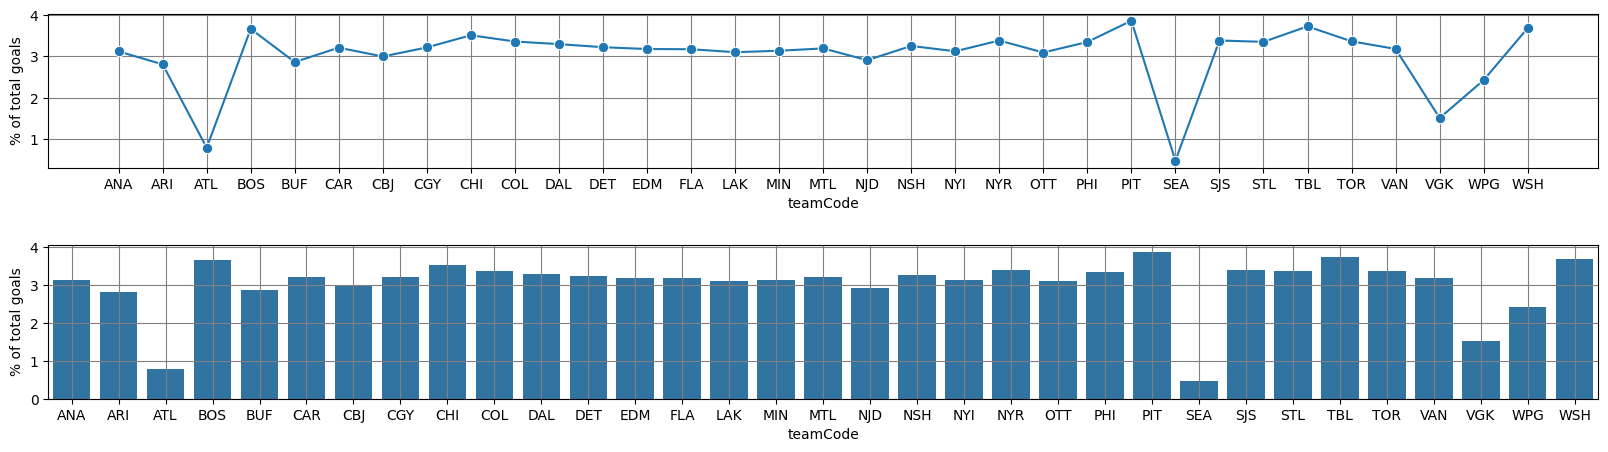

In [30]:
#It appears that no team has a significant advantage when it comes to goal scoring. 
#The very low percentages seen in the figures below are from new teams that were added to the NHL in recent years. 

fig, axes = plt.subplots(2, 1,figsize=(20,5))
sns.lineplot(data=goal_percentage_by_team, x='teamCode' ,y='% of total goals',marker='.', markersize=15,ax=axes[0])
axes[0].grid(True,color = "grey")
sns.barplot(data=goal_percentage_by_team, x='teamCode' ,y='% of total goals',ax=axes[1])
axes[1].grid(True,color = "grey")
plt.subplots_adjust(hspace=0.5);

In [31]:
#Next I was curious about the overall goal scoring pattern across seasons. 
#I grouped all goals by season and plotted the results. 

goals_by_season = all_goals.groupby('season').sum()
shots_by_season = all_shots_07_22.groupby('season')['shotID'].count()
goals_by_season.reset_index()
goals_by_season['goal percentage'] = 100*(goals_by_season['goal']/shots_by_season)
goals_by_season['goal percentage']

season
2007    6.756210
2008    6.775856
2009    6.595428
2010    6.452134
2011    6.375916
2012    6.423351
2013    6.389476
2014    6.369781
2015    6.418724
2016    6.434256
2017    6.619054
2018    6.829505
2019    6.851169
2020    6.973579
2021    7.159734
2022    7.198466
Name: goal percentage, dtype: float64

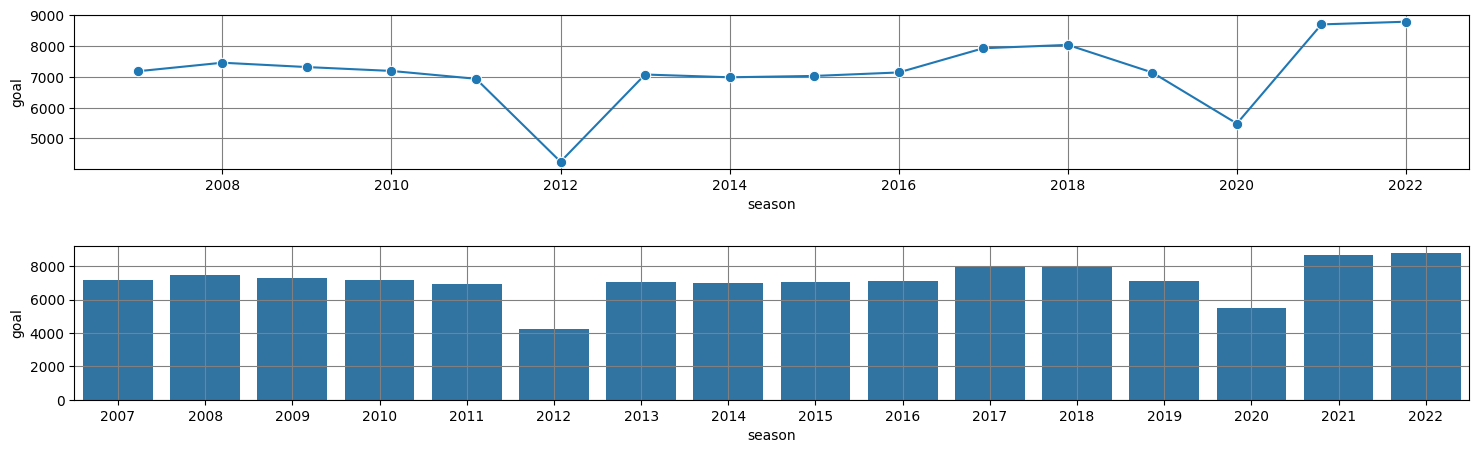

In [32]:
#There is not alot of variation in goals scored over the seasons. The 2 low points were shortened seasons due to a lock out and covid. 

fig, axes = plt.subplots(2,1, figsize=(18,5))
sns.lineplot(x ="season", y ="goal", data = goals_by_season, marker='.', markersize=15, ax=axes[0])
axes[0].grid(True,color = "grey")
sns.barplot(x=goals_by_season.index, y=goals_by_season['goal'])
axes[1].grid(True,color = "grey")
plt.subplots_adjust(hspace=0.5);

## 7. Prepare Final Data Frame

In [33]:
#I then dropped all columns that will not be needed for my final model

cols_to_keep = ['shotID', 'homeTeamCode', 'awayTeamCode', 'season', 'game_id','id',
            'timeUntilNextEvent', 'timeSinceLastEvent', 'period', 'team', 'location', 'event',
            'goal', 'shotGeneratedRebound', 'xCord', 'yCord', 'xCordAdjusted', 'yCordAdjusted',
            'shotAngle', 'shotAngleAdjusted', 'shotAnglePlusRebound', 'shotAngleReboundRoyalRoad',
            'shotDistance', 'shotType', 'shotOnEmptyNet', 'shotRebound', 'shotAnglePlusReboundSpeed', 
            'shotRush', 'speedFromLastEvent', 'lastEventxCord', 'lastEventyCord', 'distanceFromLastEvent',
            'lastEventShotAngle', 'lastEventShotDistance', 'lastEventCategory', 'homeEmptyNet',
            'awayEmptyNet', 'homeSkatersOnIce', 'awaySkatersOnIce', 'awayPenalty1Length', 
            'homePenalty1Length', 'playerPositionThatDidEvent', 'playerNumThatDidEvent', 
            'lastEventxCord_adjusted', 'lastEventyCord_adjusted', 'timeSinceFaceoff', 'shooterPlayerId',
            'shooterName', 'shooterLeftRight', 'arenaAdjustedShotDistance','arenaAdjustedXCord', 
            'arenaAdjustedYCord', 'arenaAdjustedYCordAbs', 'xGoal', 'xFroze',
            'xRebound', 'xPlayContinuedInZone', 'xPlayContinuedOutsideZone', 'xPlayStopped',
            'xShotWasOnGoal', 'shotWasOnGoal', 'teamCode', 'arenaAdjustedXCordABS']
df = all_shots_on_goal_07_22[all_shots_on_goal_07_22.columns.intersection(cols_to_keep)]
df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1239093 entries, 1595720 to 421904
Data columns (total 63 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   shotID                      1239093 non-null  int64  
 1   homeTeamCode                1239093 non-null  object 
 2   awayTeamCode                1239093 non-null  object 
 3   season                      1239093 non-null  int64  
 4   game_id                     1239093 non-null  int64  
 5   id                          1239093 non-null  int64  
 6   timeUntilNextEvent          1239093 non-null  float64
 7   timeSinceLastEvent          1239093 non-null  int64  
 8   period                      1239093 non-null  int64  
 9   team                        1239093 non-null  object 
 10  location                    1239093 non-null  object 
 11  event                       1239093 non-null  object 
 12  goal                        1239093 non-null  int64  
 1

In [34]:
df.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,timeUntilNextEvent,timeSinceLastEvent,period,team,...,xGoal,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
1595720,0,NSH,SJS,2022,20001,8,1.0,6,1,AWAY,...,0.026009,0.214393,0.037040,0.398742,0.300830,0.022987,0.710473,1.0,SJS,47.0
1595722,2,NSH,SJS,2022,20001,15,2.0,3,1,HOME,...,0.046070,0.256798,0.051420,0.358080,0.259696,0.027936,0.644651,1.0,NSH,31.0
1595723,3,NSH,SJS,2022,20001,16,0.0,2,1,HOME,...,0.296800,0.172590,0.092112,0.230564,0.183049,0.024885,0.898032,1.0,NSH,76.0
1595724,4,NSH,SJS,2022,20001,18,1.0,11,1,HOME,...,0.057435,0.128260,0.062224,0.446106,0.286419,0.019556,0.759405,1.0,NSH,82.0
1595726,6,NSH,SJS,2022,20001,26,25.0,7,1,AWAY,...,0.084009,0.083920,0.046011,0.454167,0.309893,0.022000,0.536515,1.0,SJS,75.0


## 8. Examine Outliers

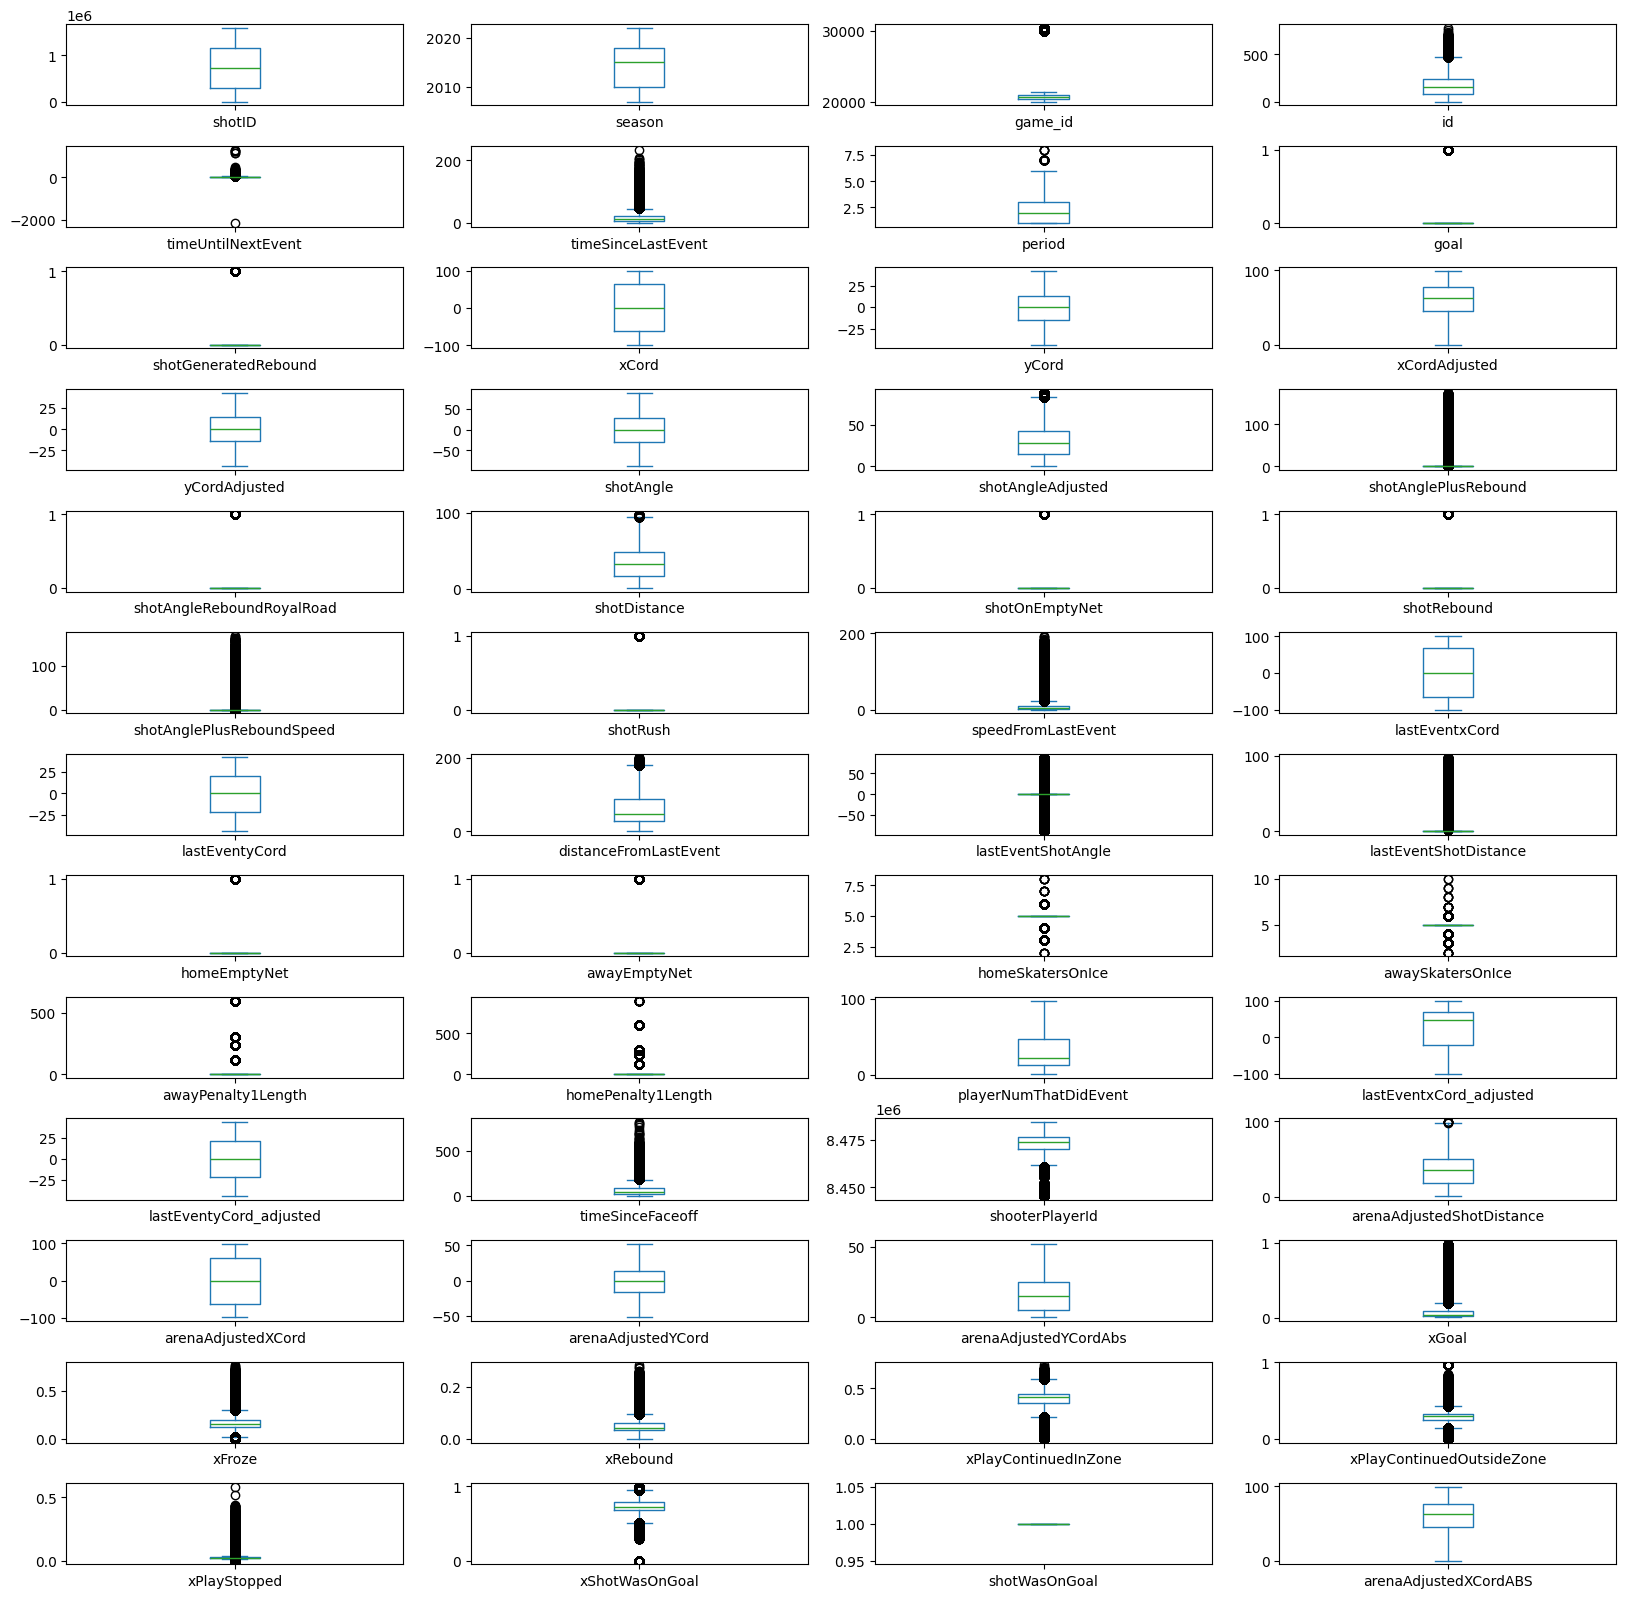

In [35]:
#Now that my data set was reduced to only columns of interest, I begin to expore any outliers

df.plot(kind="box", subplots=True, layout=(13,4), figsize=(20,20))
plt.subplots_adjust(hspace=0.5);

timeUntilNextEvent              Axes(0.125,0.747241;0.168478x0.132759)
timeSinceLastEvent           Axes(0.327174,0.747241;0.168478x0.132759)
period                       Axes(0.529348,0.747241;0.168478x0.132759)
shotAngleAdjusted            Axes(0.731522,0.747241;0.168478x0.132759)
shotAnglePlusRebound            Axes(0.125,0.587931;0.168478x0.132759)
shotDistance                 Axes(0.327174,0.587931;0.168478x0.132759)
shotAnglePlusReboundSpeed    Axes(0.529348,0.587931;0.168478x0.132759)
speedFromLastEvent           Axes(0.731522,0.587931;0.168478x0.132759)
distanceFromLastEvent           Axes(0.125,0.428621;0.168478x0.132759)
lastEventShotAngle           Axes(0.327174,0.428621;0.168478x0.132759)
lastEventShotDistance        Axes(0.529348,0.428621;0.168478x0.132759)
homeSkatersOnIce             Axes(0.731522,0.428621;0.168478x0.132759)
awaySkatersOnIce                 Axes(0.125,0.26931;0.168478x0.132759)
awayPenalty1Length            Axes(0.327174,0.26931;0.168478x0.132759)
homePe

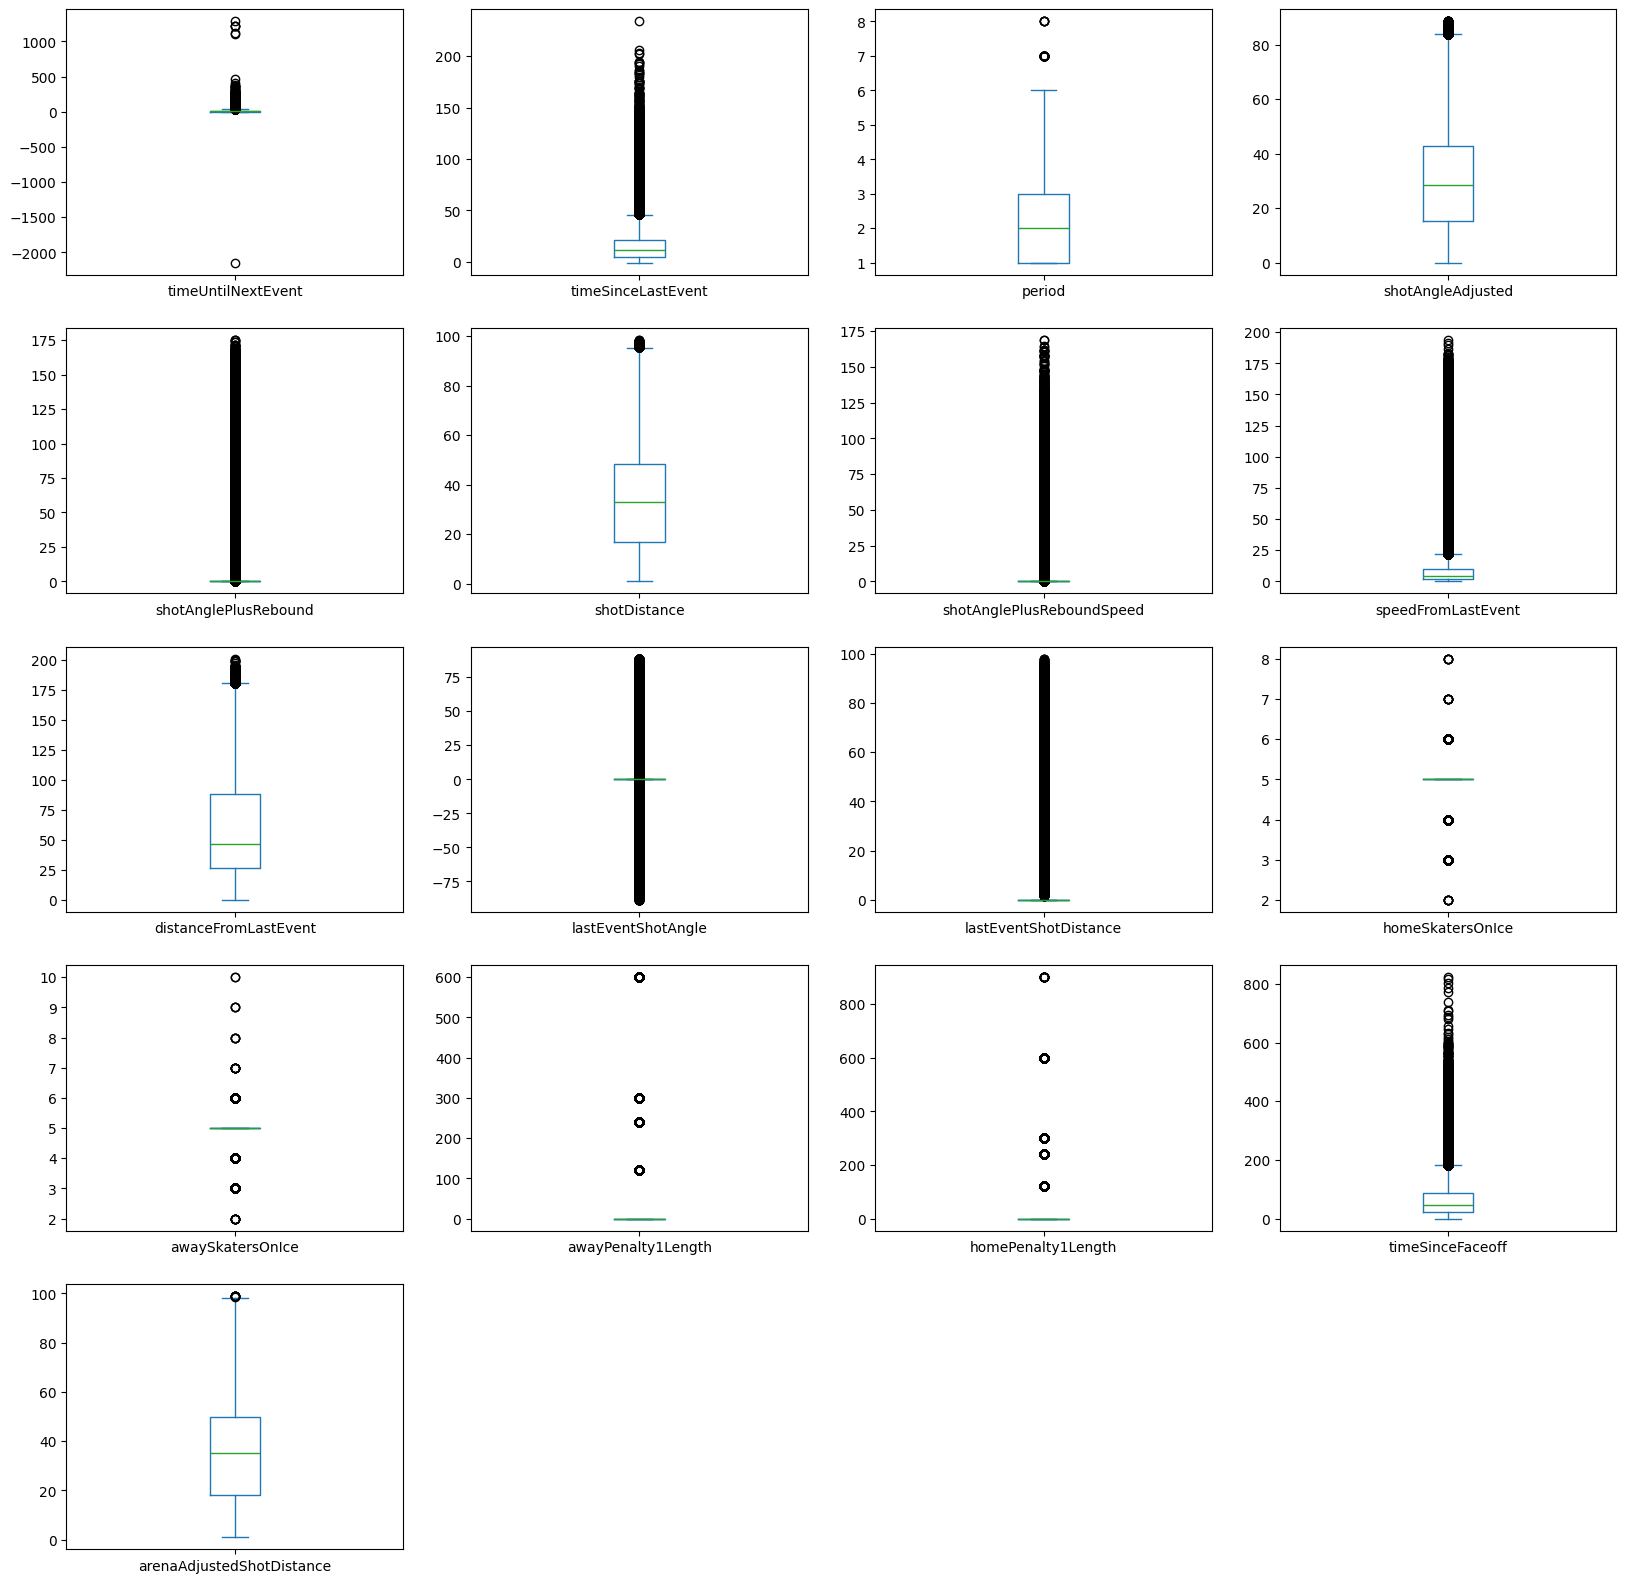

In [36]:
#I reduced the plots to only columns that had potiental issues with outliers

cols_of_intrest = ['timeUntilNextEvent', 'timeSinceLastEvent', 'period', 'shotAngleAdjusted',
                   'shotAnglePlusRebound', 'shotDistance', 'shotAnglePlusReboundSpeed', 'speedFromLastEvent',
                   'distanceFromLastEvent', 'lastEventShotAngle', 'lastEventShotDistance', 'homeSkatersOnIce',
                   'awaySkatersOnIce', 'awayPenalty1Length', 'homePenalty1Length', 'timeSinceFaceoff', 'arenaAdjustedShotDistance']
df[cols_of_intrest].plot(kind="box", subplots=True, layout=(5,4), figsize=(20,20))

In [37]:
#I watched this game live and this game went 8 periods when you condsider the 5 overtime periods played before winner was determined. 
#No outliers detected.

period_outlier = df[df['period'] >= 8]
period_outlier

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,timeUntilNextEvent,timeSinceLastEvent,period,team,...,xGoal,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
296957,296957,TBL,CBJ,2019,30121,776,0.0,4,8,HOME,...,0.037665,0.190305,0.041279,0.452137,0.255311,0.023303,0.645334,1.0,TBL,49.0
296954,296954,TBL,CBJ,2019,30121,755,26.0,8,8,AWAY,...,0.023492,0.151414,0.034661,0.451080,0.318440,0.020913,0.629693,1.0,CBJ,47.0
296948,296948,TBL,CBJ,2019,30121,733,0.0,0,8,AWAY,...,0.021857,0.253036,0.035004,0.326224,0.314882,0.048996,0.723276,1.0,CBJ,38.0
296946,296946,TBL,CBJ,2019,30121,725,0.0,13,8,AWAY,...,0.014477,0.255661,0.037538,0.375208,0.292974,0.024142,0.780945,1.0,CBJ,28.0


In [38]:
#possible outliers. Only 6 max players allowed on ice at any given time

homeSkater_outlier = df[df['homeSkatersOnIce'] >= 7]
print(homeSkater_outlier['homeSkatersOnIce'].count())
homeSkater_outlier[['homeSkatersOnIce', 'game_id', 'season', 'homeTeamCode','awayTeamCode','homePenalty1Length', 
                    'awayPenalty1Length', 'homeEmptyNet', 'awayEmptyNet']]

12


,homeSkatersOnIce,game_id,season,homeTeamCode,awayTeamCode,homePenalty1Length,awayPenalty1Length,homeEmptyNet,awayEmptyNet
1602091,7,20074,2022,BOS,MIN,0,0,0,0
83083,7,20969,2021,MTL,DAL,0,0,1,0
131148,8,20127,2020,WSH,BOS,0,0,0,0
131147,8,20127,2020,WSH,BOS,0,0,0,0
131146,8,20127,2020,WSH,BOS,0,0,0,0
144337,8,20308,2020,PHI,NYR,0,0,0,0
233133,7,20385,2019,NSH,VGK,0,0,0,1
233132,7,20385,2019,NSH,VGK,0,0,0,1
1396286,8,20375,2016,CGY,ANA,0,0,0,0
1342093,7,21047,2015,BUF,MTL,0,0,0,0


In [39]:
#possible outliers. Only 6 max players allowed on ice at any given time

awaySkater_outlier = df[df['awaySkatersOnIce'] >= 7]
print(awaySkater_outlier['awaySkatersOnIce'].count())
awaySkater_outlier[['awaySkatersOnIce', 'game_id', 'season', 'homeTeamCode','awayTeamCode','homePenalty1Length', 
                    'awayPenalty1Length', 'homeEmptyNet', 'awayEmptyNet']]

18


,awaySkatersOnIce,game_id,season,homeTeamCode,awayTeamCode,homePenalty1Length,awayPenalty1Length,homeEmptyNet,awayEmptyNet
131084,7,20126,2020,PHI,NYI,0,0,0,0
152148,7,20398,2020,MIN,VGK,0,0,0,1
290677,7,21054,2019,FLA,MTL,0,0,0,1
212411,9,20144,2019,TBL,PIT,0,0,0,0
212410,9,20144,2019,TBL,PIT,0,0,0,0
212409,9,20144,2019,TBL,PIT,0,0,0,0
212401,8,20144,2019,TBL,PIT,0,0,0,0
213595,8,20159,2019,DET,BUF,0,0,0,0
231775,7,20369,2019,CBJ,OTT,0,0,0,0
242576,10,20497,2019,ANA,LAK,0,0,0,0


In [40]:
#I repeteated steps above but looked at rows that had 2 or less skaters on the ice. 
#It is not possible to have less than 3 skaters on the ice. 

homeSkater_outlier2 = df[df['homeSkatersOnIce'] <= 2]
print(homeSkater_outlier2['homeSkatersOnIce'].count())
homeSkater_outlier2[['homeSkatersOnIce', 'game_id', 'season', 'homeTeamCode','awayTeamCode']]

6


,homeSkatersOnIce,game_id,season,homeTeamCode,awayTeamCode
122851,2,20019,2020,TBL,CHI
122890,2,20019,2020,TBL,CHI
141729,2,20287,2020,COL,VGK
294022,2,30092,2019,CGY,WPG
221806,2,20256,2019,TBL,BUF
1418184,2,20636,2016,FLA,NYI


In [41]:
#There were rows with less that 3 skater resulting in more outliers.

awaySkater_outlier2 = df[df['awaySkatersOnIce'] <= 2]
print(awaySkater_outlier2['awaySkatersOnIce'].count())
awaySkater_outlier2[['awaySkatersOnIce', 'game_id', 'season', 'homeTeamCode','awayTeamCode']]

8


,awaySkatersOnIce,game_id,season,homeTeamCode,awayTeamCode
131626,2,20135,2020,ANA,STL
199785,2,30412,2020,TBL,MTL
271991,2,20839,2019,TOR,ANA
271990,2,20839,2019,TOR,ANA
273091,2,20852,2019,STL,DAL
287692,2,21019,2019,TBL,BOS
288832,2,21034,2019,TBL,MTL
1257150,2,20019,2015,TOR,OTT


In [42]:
#no outliers detected, it is possible to have 15 minutes (900 seconds) of penalty time.

penalty_outlier = df[df['homePenalty1Length'] > 900]
print(penalty_outlier['homePenalty1Length'].count()) 

0


## 9. Remove Outliers

In [43]:
#I isolated the indexes of all possible outliers that would skew my data
#I then dropped all outliers

indexes = pd.concat([homeSkater_outlier,homeSkater_outlier2, awaySkater_outlier, awaySkater_outlier2])
toDrop = list(indexes.index)

In [44]:
df_filtered = df.drop(index=toDrop)

In [45]:
df_filtered.index

Index([1595720, 1595722, 1595723, 1595724, 1595726, 1595728, 1595729, 1595730,
       1595731, 1595733,
       ...
        421884,  421883,  421882,  421881,  421880,  421879,  421878,  421876,
        421905,  421904],
      dtype='int64', length=1239049)

In [46]:
#I then verified all outliers were dropped

df_filtered[df_filtered['awaySkatersOnIce'] <= 2]

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,timeUntilNextEvent,timeSinceLastEvent,period,team,...,xGoal,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,arenaAdjustedXCordABS


In [47]:
df_filtered[df_filtered['homeSkatersOnIce'] <= 2]

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,timeUntilNextEvent,timeSinceLastEvent,period,team,...,xGoal,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,arenaAdjustedXCordABS


In [48]:
df_filtered[df_filtered['awaySkatersOnIce'] >= 7]

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,timeUntilNextEvent,timeSinceLastEvent,period,team,...,xGoal,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,arenaAdjustedXCordABS


In [49]:
df_filtered[df_filtered['homeSkatersOnIce'] >= 7]

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,timeUntilNextEvent,timeSinceLastEvent,period,team,...,xGoal,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,arenaAdjustedXCordABS


In [50]:
#I did on more final check for duplicates in my data and found none. 

print(df_filtered.duplicated().sum())

0


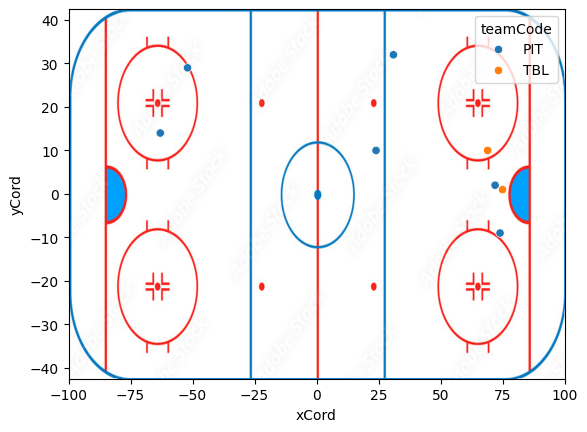

In [51]:
#As a bonus, I was curious about creating a visual of the goal scoring locations.
#I plotted all the goals scored in the first game of the 2021 season. 

img = mpimg.imread(r"C:\Users\Travi\Downloads\rink2.png")
first_game=all_goals.groupby(all_goals['game_id'])
first_game=all_goals[all_goals['game_id'] == 20001]
first_game_2021=first_game[first_game['season'] == 2021]
first_game_2021
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -42.5, 42.5], aspect='auto', zorder=-1)
sns.scatterplot(x ="xCord", y ="yCord", data = first_game_2021, ax=ax, hue='teamCode')
plt.show()

## 10. Save Final Data

In [52]:
#The last step was saving the cleaned data for use in the EDA process. 

shots_07_22 = df_filtered

In [53]:
def save_file(df, directory, filename):
    """
    Save the given DataFrame to the specified directory with the given filename.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to save.
    directory (str): The directory where the DataFrame will be saved.
    filename (str): The name of the file to save the DataFrame as.
    """
    file_path = f"{directory}/{filename}.csv"
    df.to_csv(file_path, index=False)

In [54]:
directory = r'C:\Users\Travi\OneDrive\Documents\GitHub\Springboard\nhl data\shots_07_22'
save_file(shots_07_22, directory, 'shots_07_22_cleaned.csv')